In [1]:
import numpy as np
import pandas as pd
from pycaret.regression import *

In [2]:
#Loading the crop production data as Pandas dataframe

path = r"F:\UM Internship\Crop Production Analysis in India\Crop Production data cleaned.xlsx"
data = pd.read_excel(path)

In [90]:
#Extracting the State, District, Crop Year, Season, Crop and Production columns for prediction

production_data = data.iloc[:, [0, 1, 2, 3, 4, 6]]

In [92]:
#Sorting the dataframe in ascending order of Crop Year
#because the correct sequence of years is necessary for time-series analysis 

production_data = production_data.sort_values(by='Crop Year').reset_index(drop=True)
production_data.head()

,State,District,Crop Year,Season,Crop,Production
0,Uttar Pradesh,MAU,1997,Kharif,Jowar,33.0
1,Uttar Pradesh,ALLAHABAD,1997,Rabi,Masoor,2399.0
2,Uttar Pradesh,ALLAHABAD,1997,Rabi,Peas & beans (Pulses),6054.0
3,Uttar Pradesh,ALLAHABAD,1997,Rabi,Rapeseed &Mustard,701.0
4,Assam,GOALPARA,1997,Autumn,Rice,17189.0


In [93]:
#One-hot encoding the categorical variables (State, District, Season, Crop) with binary values (0 and 1)

production_data = pd.get_dummies(production_data, columns=['State', 'District', 'Season', 'Crop'], dtype=int, drop_first=True)
production_data

,Crop Year,Production,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Haveli,State_Goa,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1997,33.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997,2399.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,6054.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1997,701.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,17189.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241795,2014,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241796,2014,5100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241797,2014,33000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
241798,2014,1100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#Creating 2 step lags based on the Production values

production_data['lag1'] = production_data['Production'].shift(1)
production_data['lag2'] = production_data['Production'].shift(2)
production_data

,Crop Year,Production,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Haveli,State_Goa,...,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds,lag1,lag2
0,1997,33.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1997,2399.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33.0,NaN
2,1997,6054.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2399.0,33.0
3,1997,701.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6054.0,2399.0
4,1997,17189.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,701.0,6054.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241795,2014,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5000.0,220400.0
241796,2014,5100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100.0,5000.0
241797,2014,33000.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,5100.0,100.0
241798,2014,1100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33000.0,5100.0


In [95]:
#Calculating rolling mean and rolling standard deviation from the Production values 

production_data['rolling_mean'] = production_data['Production'].rolling(window=3).mean()
production_data['rolling_std'] = production_data['Production'].rolling(window=3).std()
production_data

,Crop Year,Production,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Haveli,State_Goa,...,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds,lag1,lag2,rolling_mean,rolling_std
0,1997,33.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,1997,2399.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,33.0,NaN,NaN,NaN
2,1997,6054.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2399.0,33.0,2828.666667,3033.409028
3,1997,701.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6054.0,2399.0,3051.333333,2735.471867
4,1997,17189.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,701.0,6054.0,7981.333333,8411.271981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241795,2014,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5000.0,220400.0,75166.666667,125799.619583
241796,2014,5100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,100.0,5000.0,3400.000000,2858.488062
241797,2014,33000.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,5100.0,100.0,12733.333333,17728.629031
241798,2014,1100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,33000.0,5100.0,13066.666667,17378.270550


In [96]:
#Removing the rows with null values resulting from creation of lags and calculation of rolling statistics 
#This gives us the final data prepared to be given as input for training

production_data = production_data.dropna()
production_data

,Crop Year,Production,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Haveli,State_Goa,...,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds,lag1,lag2,rolling_mean,rolling_std
2,1997,6054.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2399.0,33.0,2828.666667,3033.409028
3,1997,701.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6054.0,2399.0,3051.333333,2735.471867
4,1997,17189.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,701.0,6054.0,7981.333333,8411.271981
5,1997,322.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,17189.0,701.0,6070.666667,9630.623673
6,1997,4.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,322.0,17189.0,5838.333333,9831.251514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241795,2014,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5000.0,220400.0,75166.666667,125799.619583
241796,2014,5100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,100.0,5000.0,3400.000000,2858.488062
241797,2014,33000.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,5100.0,100.0,12733.333333,17728.629031
241798,2014,1100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,33000.0,5100.0,13066.666667,17378.270550


In [97]:
#Creating the training setup by providing the prepared data as input and 'Production' as the target variable to be predicted

s = setup(production_data, target='Production', session_id=42, data_split_shuffle=False, fold_shuffle=False, fold_strategy='timeseries')

,Description,Value
0,Session id,42
1,Target,Production
2,Target type,Regression
3,Original data shape,"(241798, 817)"
4,Transformed data shape,"(241798, 817)"
5,Transformed train set shape,"(169258, 817)"
6,Transformed test set shape,"(72540, 817)"
7,Numeric features,816
8,Preprocess,True
9,Imputation type,simple


In [98]:
training_data = get_config(variable="X_train")

In [100]:
training_data

,Crop Year,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Haveli,State_Goa,State_Gujarat,...,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds,lag1,lag2,rolling_mean,rolling_std
2,1997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2399.0,33.0,2828.666748,3033.408936
3,1997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6054.0,2399.0,3051.333252,2735.471924
4,1997,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,701.0,6054.0,7981.333496,8411.272461
5,1997,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,17189.0,701.0,6070.666504,9630.624023
6,1997,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,322.0,17189.0,5838.333496,9831.251953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169255,2009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,242.0,272.0,346.333344,156.158859
169256,2009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,525.0,242.0,2511.666748,3688.837402
169257,2009,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,6768.0,525.0,6397.666504,5696.554688
169258,2009,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,11900.0,6768.0,6422.666504,5657.929199


In [101]:
training_data.shape

(169258, 816)

In [102]:
#All the available regression models

models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [69]:
#Training all the models with the training data with 50 iterations for each model.
#fold parameter value has been reduced from default value of 10 to 5, because the size of the training data is huge.

#Random Forest and Extra Trees models have been excluded and run separately
#with smaller parameter values than default, since they were taking excessively long time.


best_model = compare_models(exclude=['rf', 'et'], fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,13.2253,5621.3967,51.1310,1.0000,0.3707,0.6285,11.5040
ridge,Ridge Regression,0.0859,1.2115,0.5420,1.0000,0.0122,0.0031,6.1840
en,Elastic Net,12.8505,4763.8286,46.4618,1.0000,0.3869,0.6755,5.9820
llar,Lasso Least Angle Regression,0.0619,1.2077,0.5207,1.0000,0.0075,0.0010,6.4200
omp,Orthogonal Matching Pursuit,0.0619,1.2078,0.5207,1.0000,0.0075,0.0010,6.2460
par,Passive Aggressive Regressor,0.1497,2.9717,0.8277,1.0000,0.0158,0.0072,5.5220
huber,Huber Regressor,410.8247,797776.7457,486.2731,0.9999,0.9087,24.3082,81.7900
lr,Linear Regression,4898.6181,66970008.4215,6481.7763,0.9991,2.6398,410.4571,11.1360
knn,K Neighbors Regressor,51935.5427,7993560753006.4004,1275427.6235,0.9952,1.2092,50.0663,105.1960
dt,Decision Tree Regressor,63513.7215,8424935104889.4932,1396897.4859,0.8091,1.7133,42.8622,11.5000


In [71]:
#Training the Random Forest Regressor model separately

rf_model = create_model('rf', n_estimators=50, max_depth=10, n_jobs=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7467.9688,1740589776.4307,41720.3760,0.9993,2.4183,67.4455
1,6641.0241,8559620571.3740,92518.2175,0.6151,2.2606,59.6267
2,9111.3713,3411266139.3962,58406.0454,0.9984,2.1617,46.0889
3,26950.7210,73705860231.4687,271488.2322,0.6254,2.7883,99.6152
4,10220.7850,6104112010.0816,78128.8168,0.9568,2.4201,89.7086
5,499778.8648,76960684805000.7500,8772723.9102,0.9790,3.1802,851.1595
6,5484.1526,314186978.9942,17725.3203,0.9916,3.1861,1170.8993
7,11183.8838,17384540756.0935,131850.4484,0.9568,2.1577,29.4544
8,3142.1871,68404935.5894,8270.7276,0.9567,2.6552,242.4335


In [72]:
#Training the Extra Trees Regressor model separately

et_model = create_model('et', n_estimators=50, max_depth=10, n_jobs=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13457.6769,1269098876.3096,35624.4140,0.9995,3.9003,475.4961
1,17806.9195,20041447939.3805,141567.8210,0.0989,3.3957,181.8066
2,18794.0277,6702635544.8345,81869.6253,0.9968,3.3429,201.9498
3,51140.2950,178588373770.7890,422597.1767,0.0923,3.5094,209.3320
4,19391.9078,5908181491.9627,76864.6960,0.9582,3.2135,188.4794
5,429269.3510,57737092909311.1953,7598492.8051,0.9843,3.8914,1375.9429
6,18129.9304,8634906616.7983,92924.1982,0.7695,4.0342,2420.3000
7,31841.8659,57371830229.2846,239524.1746,0.8573,3.0045,124.5555
8,11940.8305,901018210.2451,30016.9654,0.4295,3.7639,680.8271


In [103]:
#Lasso Least Angle Regression (LLAR) model turns out to be the best model for the crop prediction
#since it has minimum error values among all the trained models and also has a perfect R-Square value of 1 

llar_model = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0394,0.6821,0.8259,1.0000,0.0048,0.0006
1,0.0402,0.5936,0.7705,1.0000,0.0031,0.0006
2,0.0379,0.4570,0.6760,1.0000,0.0150,0.0013
3,0.0384,0.7705,0.8778,1.0000,0.0296,0.0012
4,0.0288,0.3530,0.5942,1.0000,0.0249,0.0008
5,0.0441,0.8048,0.8971,1.0000,0.0204,0.0017
6,0.0394,0.6746,0.8213,1.0000,0.0276,0.0040
7,0.0373,0.6523,0.8076,1.0000,0.0085,0.0004
8,0.0347,0.5221,0.7226,1.0000,0.0141,0.0011


In [104]:
llar_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'eps': 2.220446049250313e-16,
 'fit_intercept': True,
 'fit_path': True,
 'jitter': None,
 'max_iter': 500,
 'positive': False,
 'precompute': 'auto',
 'random_state': 42,
 'verbose': False}

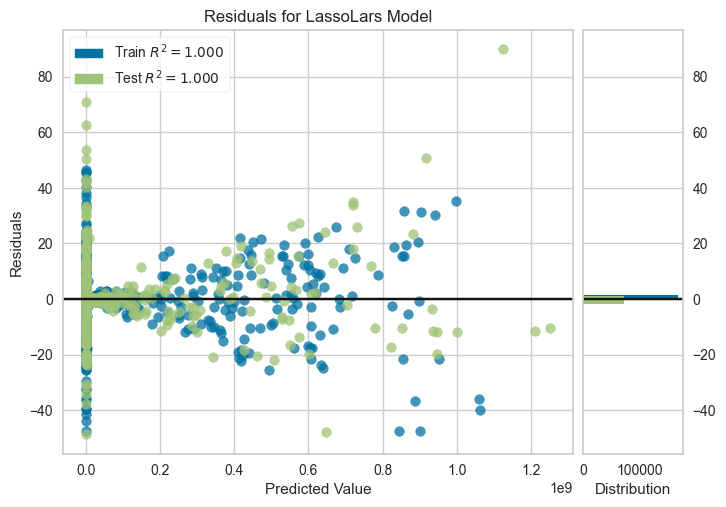

In [105]:
plot_model(llar_model)

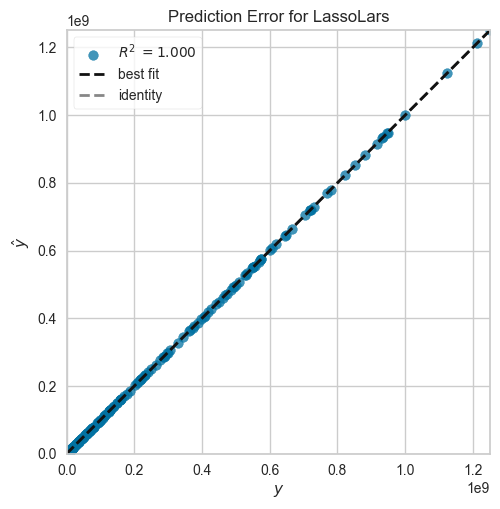

In [106]:
plot_model(llar_model, plot='error')

In [142]:
#Since 2005 has all States in the dataset, 2005 data is filtered out and used as the base data for crop prediction.
#Crop Year value is increased to 2006, Production column is removed since it is to be predicted,
#and then crop producton is predicted for 2006 using the LLAR model with this modified dataframe as input.

production_2005 = production_data[production_data['Crop Year'] == 2005].reset_index(drop=True)
production_2005['Crop Year'] = 2006
production_2005.drop(columns=['Production'], inplace=True)
prediction_2006 = predict_model(llar_model, data=production_2005)


#Lags and rolling statistcs are freshly calculated based on the new predicted Production values, null rows are removed,
#Crop Year value is increased by 1 year, predicted Production column is removed
#for the next round of prediction (for the succeeding year), and then the crop production is predicted using the LLAR model
#with this modified dataframe as input.

#This entire process is put under a while loop that runs until the Crop Year value reaches 2031.

prediction_dataset = prediction_2006
prediction_year = 2007
while prediction_year < 2031:
    prediction_dataset['lag1'] = prediction_dataset['prediction_label'].shift(1)
    prediction_dataset['lag2'] = prediction_dataset['prediction_label'].shift(2)
    prediction_dataset['rolling_mean'] = prediction_dataset['prediction_label'].rolling(window=3).mean()
    prediction_dataset['rolling_std'] = prediction_dataset['prediction_label'].rolling(window=3).std()
    prediction_dataset = prediction_dataset.dropna()
    prediction_dataset['Crop Year'] = prediction_year
    prediction_dataset.drop(columns=['prediction_label'], inplace=True)
    prediction_dataset = predict_model(llar_model, data=prediction_dataset)
    #saving the prediction data for the years 2024 to 2030 as csv files
    if prediction_year >= 2024:
        prediction_dataset.to_csv(fr"F:\UM Internship\Crop Production Analysis in India\prediction_{prediction_year}.csv")
    prediction_year += 1


In [66]:
#Using a for loop, the saved csv files are loaded, one by one, as Pandas dataframes,
#the binary encodings are reversed back to get the original categorical columns, the unnecessary columns are removed,
#and the resulting dataframes are stored in a list.

datasets = []
for year in range(2024, 2031):
    prediction_dataset = pd.read_csv(fr"F:\UM Internship\Crop Production Analysis in India\prediction_{year}.csv")
    prediction_dataset.drop(columns=['Unnamed: 0'], inplace=True)
    state_cols = list(prediction_dataset.columns)[1:33]
    dist_cols = list(prediction_dataset.columns)[33:684]
    season_cols = list(prediction_dataset.columns)[684:689]
    crop_cols = list(prediction_dataset.columns)[689:812]
    prediction_dataset['State'] = prediction_dataset[state_cols].idxmax(axis=1).str.replace('State_', '')
    prediction_dataset['District'] = prediction_dataset[dist_cols].idxmax(axis=1).str.replace('District_', '')
    prediction_dataset['Season'] = prediction_dataset[season_cols].idxmax(axis=1).str.replace('Season_', '')
    prediction_dataset['Crop'] = prediction_dataset[crop_cols].idxmax(axis=1).str.replace('Crop_', '')
    prediction_dataset.drop(columns = state_cols + dist_cols + season_cols + crop_cols + ['lag1', 'lag2', 'rolling_mean', 'rolling_std'], inplace=True)
    prediction_dataset = prediction_dataset[['Crop Year', 'State', 'District', 'Season', 'Crop', 'prediction_label']]
    datasets.append(prediction_dataset)

    
#The dataframes stored in the list are merged together to create one combined dataframe    
crop_prediction = pd.concat(datasets, ignore_index=True)
crop_prediction.rename(columns={'prediction_label':'Production (Predicted)'}, inplace=True)

#Saving the combined dataframe as a csv file
crop_prediction.to_csv(r"F:\UM Internship\Crop Production Analysis in India\India_crop_prediction.csv", index=False)


In [67]:
#The combined data contains predicted values of crop production in India from 2024 to 2030

india_crop_prediction = pd.read_csv(r"F:\UM Internship\Crop Production Analysis in India\India_crop_prediction.csv")
india_crop_prediction

,Crop Year,State,District,Season,Crop,Production (Predicted)
0,2024,Tamil Nadu,TIRUCHIRAPPALLI,Kharif,Jowar,12439.026489
1,2024,Tamil Nadu,TIRUCHIRAPPALLI,Kharif,Moong(Green Gram),131.028274
2,2024,Tamil Nadu,TIRUCHIRAPPALLI,Kharif,Other Kharif pulses,108.034350
3,2024,Tamil Nadu,TIRUCHIRAPPALLI,Kharif,Ragi,77.030314
4,2024,Tamil Nadu,TIRUCHIRAPPALLI,Kharif,Rice,236739.939430
...,...,...,...,...,...,...
94334,2030,Himachal Pradesh,SOLAN,Kharif,Horse-gram,79.035515
94335,2030,Bihar,NAWADA,Kharif,Groundnut,94.040064
94336,2030,Himachal Pradesh,SOLAN,Kharif,Maize,36402.035071
94337,2030,Himachal Pradesh,SHIMLA,Rabi,Masoor,16.041166
